### delayed-delayed matrix

In [1]:
ifstream ifs("/data/d3/zhangjizhi/MNT/validID.txt");    //文件 useID.txt 存储了无异常的 runid
int runid;
TH2F *dd = new TH2F("dd","delayed-delayed gamma matrix",2000,0,2000,2000,0,2000);
while (ifs>>runid){
    TFile *ipf = new TFile(Form("/data/d3/zhangjizhi/MNT/MATRIX/delaydelay/ddmat%04d.root",runid));
    TH2F *buf = (TH2F*)ipf->Get("dd");
    dd->Add(dd,buf);
    delete buf;
}

In [2]:
TCanvas *c1 = new TCanvas;

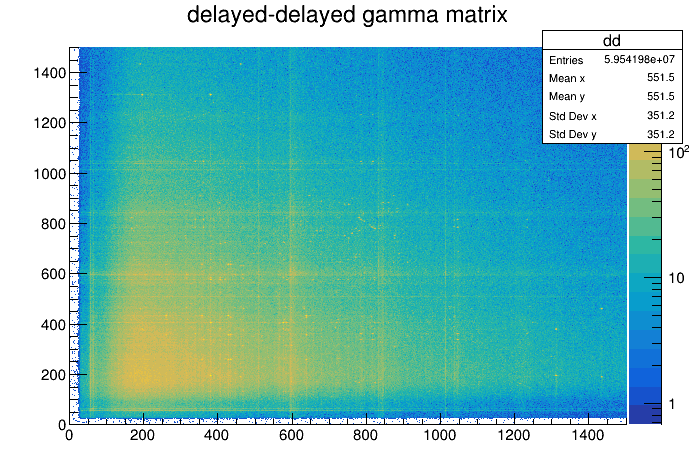

In [3]:
dd->SetAxisRange(0,1500,"X");
dd->SetAxisRange(0,1500,"Y");
dd->Draw("colz");
c1->SetLogz();
c1->Draw();

In [4]:
dd->SetAxisRange(0,2000,"X");
dd->SetAxisRange(0,2000,"Y");

#### 载入函数

In [5]:
gROOT->ProcessLine(".L bgsub.C");
gROOT->ProcessLine(".L bgsub_radware.C");
gROOT->ProcessLine(".L gate.C");
gROOT->ProcessLine(".L draw_peaks.C");

#### 减本底总投影谱，用于观察开窗峰附近情况

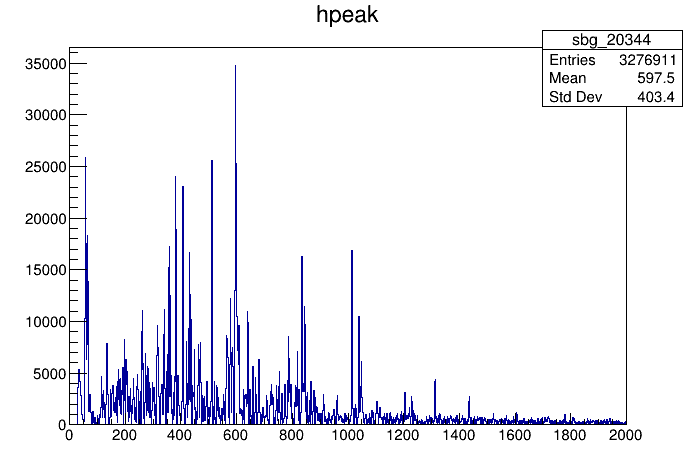

In [6]:
TH1D *ddpeak = dd->ProjectionX("hg");//减本底总投影谱，用来观察开窗峰附近情况
ddpeak = bgsub(ddpeak);
ddpeak->Draw();
c1->Draw();

In [30]:
%jsroot on
draw_peaks(ddpeak);

In [8]:
double delayed[10] = {153.6, 176.8, 273.9, 340.8, 363.0, 787.1, 818.6, 963.6, 1048.0, 1236.1};
int num;

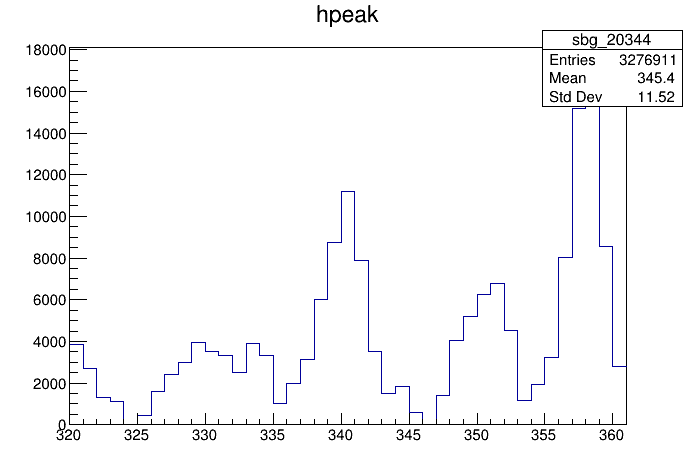

In [9]:
num = 3;
ddpeak->SetAxisRange(delayed[num]-20,delayed[num]+20,"X");
ddpeak->Draw();
c1->Draw();

![136Ba_level_scheme](../img/136Ba_level_scheme.png)

#### 预期符合关系

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 86.8 | 66.9 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | X | O | O | X | X |
| 340.8  | O | O | X | O | O | X | X | X | X | X | X | X |
| 787.1  | O | O | O | X | O | O | O | O | O | O | X | O |
| 363.0  | O | O | O | O | X | O | O | O | O | O | O | O |
| 1235.2 | O | X | X | O | O | X | O | O | O | X | X | X |
| 153.6  | O | X | X | O | O | O | X | X | X | X | X | X |
|  86.8  | O | X | X | O | O | O | X | X | O | X | X | X |
|  66.9  | O | O | X | O | O | O | X | O | X | O | X | X |
| 273.9  | O | O | X | O | O | X | X | X | O | X | X | X |
| 963.6  | X | X | X | X | O | X | X | X | X | X | X | X |
| 176.8  | X | X | X | O | O | X | X | X | X | X | X | X |

In [10]:
%jsroot on
TH2D *ddsub = bgsub_radware(dd);//二维减本底谱
TH1D *gate_radware, *gate_raw;//开窗谱

#### 818.6 keV gate

In [11]:
gate_radware = gate(ddsub,818.6,1);
draw_peaks(gate_radware,4);

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |

In [12]:
gate_raw = gate(dd,818.6,1,-12,-12,9,10);
draw_peaks(gate_raw,3);

#### 1048.0 keV gate

In [13]:
gate_radware = gate(ddsub,1048.,2);
draw_peaks(gate_radware,4);

1235 keV 预期无符合，实际看到1230 keV

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | O | X | X |

In [14]:
gate_raw = gate(dd,1048.,2,-16,-15,10,10);
draw_peaks(gate_raw,6);

#### 340.8 keV gate

In [15]:
gate_radware = gate(ddsub,340.8,2);
draw_peaks(gate_radware,4);

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | O | X | X |
| 340.8  | O | O | X | O | O | X | X | X | X | X |

In [16]:
gate_raw = gate(dd,340.8,2,-16,-16,6,6);
draw_peaks(gate_raw,3);

#### 787.1 keV gate

In [17]:
gate_radware = gate(ddsub,787.1,2);
draw_peaks(gate_radware);

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | O | X | X |
| 340.8  | O | O | X | O | O | X | X | X | X | X |
| 787.1  | O | O | O | X | O | O | O | O | X | O |

In [18]:
gate_raw = gate(dd,787.1,2,-8,-8,12,12);
draw_peaks(gate_raw);

#### 363.0 keV gate

In [19]:
gate_radware = gate(ddsub,363.0,1);
draw_peaks(gate_radware);

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | O | X | X |
| 340.8  | O | O | X | O | O | X | X | X | X | X |
| 787.1  | O | O | O | X | O | O | O | O | X | O |
| 363.0  | O | O | O | O | X | O | O | O | O | O |

In [20]:
gate_raw = gate(dd,363.0,1,-17,-17,6,7);
draw_peaks(gate_raw,4);

#### 1235.2 keV gate

In [21]:
gate_radware = gate(ddsub,1236.0,1);
draw_peaks(gate_radware,4);

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | O | X | X |
| 340.8  | O | O | X | O | O | X | X | X | X | X |
| 787.1  | O | O | O | X | O | O | O | O | X | O |
| 363.0  | O | O | O | O | X | O | O | O | O | O |
| 1235.2 | O | X | X | O | O | X | O | X | X | X |

In [22]:
gate_raw = gate(dd,1236.0,1,-6,-4,3,5);
draw_peaks(gate_raw);

#### 153.6 keV gate

In [23]:
gate_radware = gate(ddsub,153.6,1);
draw_peaks(gate_radware);

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | O | X | X |
| 340.8  | O | O | X | O | O | X | X | X | X | X |
| 787.1  | O | O | O | X | O | O | O | O | X | O |
| 363.0  | O | O | O | O | X | O | O | O | O | O |
| 1235.2 | O | X | X | O | O | X | O | X | X | X |
| 153.6  | O | X | X | O | O | O | X | X | X | X |

###### 153 keV 在投影谱中难以辨认

#### 273.9 keV gate

In [24]:
gate_radware = gate(ddsub,273.9,2);
draw_peaks(gate_radware);

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | O | X | X |
| 340.8  | O | O | X | O | O | X | X | X | X | X |
| 787.1  | O | O | O | X | O | O | O | O | X | O |
| 363.0  | O | O | O | O | X | O | O | O | O | O |
| 1235.2 | O | X | X | O | O | X | O | X | X | X |
| 153.6  | O | X | X | O | O | O | X | X | X | X |
| 273.9  | O | O | X | O | O | X | X | X | X | X |

In [25]:
gate_raw = gate(dd,273.9,2,-5,-5,20,20);
draw_peaks(gate_raw,3);

#### 963.6 keV gate

In [26]:
gate_radware = gate(ddsub,963.6,1);
draw_peaks(gate_radware);

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | O | X | X |
| 340.8  | O | O | X | O | O | X | X | X | X | X |
| 787.1  | O | O | O | X | O | O | O | O | X | O |
| 363.0  | O | O | O | O | X | O | O | O | O | O |
| 1235.2 | O | X | X | O | O | X | O | X | X | X |
| 153.6  | O | X | X | O | O | O | X | X | X | X |
| 273.9  | O | O | X | O | O | X | X | X | X | X |
| 963.6  | X | X | X | X | O | X | X | X | X | X |

In [27]:
gate_raw = gate(dd,963.6,1,-5,-5,12,13);
draw_peaks(gate_raw,4);

#### 176.8 keV gate

In [28]:
gate_radware = gate(ddsub,176.8,1);
draw_peaks(gate_radware);

| peaks  | 818.6 | 1048.0 | 340.8 | 787.1 | 363.0 | 1235.2 | 153.6 | 273.9 | 963.6 | 176.8 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 818.6  | X | O | O | O | O | O | O | O | X | X |
| 1048.0 | O | X | O | O | O | X | X | O | X | X |
| 340.8  | O | O | X | O | O | X | X | X | X | X |
| 787.1  | O | O | O | X | O | O | O | O | X | O |
| 363.0  | O | O | O | O | X | O | O | O | O | O |
| 1235.2 | O | X | X | O | O | X | O | X | X | X |
| 153.6  | O | X | X | O | O | O | X | X | X | X |
| 273.9  | O | O | X | O | O | X | X | X | X | X |
| 963.6  | X | X | X | X | O | X | X | X | X | X |
| 176.8  | X | X | X | O | O | X | X | X | X | X |

In [29]:
gate_raw = gate(dd,176.8,1,-5,-5,17,18);
draw_peaks(gate_raw);